**Project 7: Image Classification**

**Context:**

Can you differentiate a weed from a crop seedling?

The ability to do so effectively can mean better crop yields and better stewardship of the environment.

The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has recently released a dataset containing images of unique plants belonging to 12 species at several growth stages

**Objective:**

To implement the techniques learnt as a part of the course.

**Learning Outcomes:**
* Pre-processing of image data.
* Visualization of images.
* Building CNN.
* Evaluate the Model.
* The motive of the project is to make the learners capable to handle images/image classification problems, during this process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.

**Guide to solve the project seamlessly:**

Here are the points which will help you to solve the problem efficiently:

* Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the attached problem statement should not be missed.
* Download the dataset from the Olympus platform.
* Upload the "images.npy" and “Labels.csv” file to google drive.
* Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem
statement.
* You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your
model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
labels_path = '/content/drive/My Drive/ImageClassification/Labels.csv'
images_path = '/content/drive/My Drive/ImageClassification/images.npy'

**Steps and tasks:**
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)

In [ ]:
# Imports
import cv2
from google.colab.patches import cv2_imshow

import cv2
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import os                                        
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import warnings
# Suppress warnings
warnings.filterwarnings('ignore')

In [4]:
images = np.load(images_path)

In [5]:
labels = pd.read_csv(labels_path)
labels.head()

,Label
0,Small-flowered Cranesbill
1,Small-flowered Cranesbill
2,Small-flowered Cranesbill
3,Small-flowered Cranesbill
4,Small-flowered Cranesbill


In [6]:
print(images.shape)
print(labels.shape)
print(labels['Label'].unique())

(4750, 128, 128, 3)
(4750, 1)
['Small-flowered Cranesbill' 'Fat Hen' 'Shepherds Purse' 'Common wheat'
 'Common Chickweed' 'Charlock' 'Cleavers' 'Scentless Mayweed' 'Sugar beet'
 'Maize' 'Black-grass' 'Loose Silky-bent']


So, the dataset contains a total of 4750 of 128x128 coloured images belonging to 12 classes

In [7]:
label_dict =  {0:'Small-flowered Cranesbill',
               1:'Fat Hen',
               2:'Shepherds Purse',
               3:'Common wheat',
               4:'Common Chickweed',
               5:'Charlock',
               6:'Cleavers',
               7:'centless Mayweed',
               8:'Sugar beet',
               9:'Maize',
               10:'Black-grass',
               11:'Loose Silky-bent'
               }

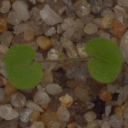

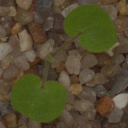

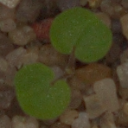

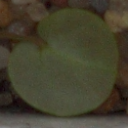

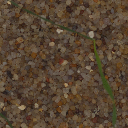

In [8]:
random_sample = [0, 100, 200, 300, 4000]
for i in random_sample:
  cv2_imshow(images[i])
  print()

2. Data Pre-processing: (15 Marks)

  a. Normalization.

  b. Gaussian Blurring.

  c. Visualize data after pre-processing.

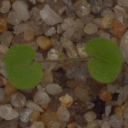

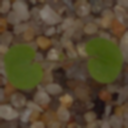

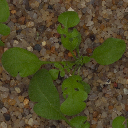

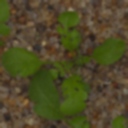

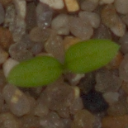

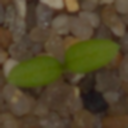

In [9]:
# Gaussian Blurring
blurred_images = []

for i in range(images.shape[0]):
  blurred_images.append(cv2.GaussianBlur(images[i], (5, 5), 0))

# Visualizing data after pre-processing.
for i in [0, 1000, 2000]:
  cv2_imshow(images[i])
  print()
  cv2_imshow(blurred_images[i])
  print('\n\n')

# Normalize the data
blurred_images = np.array(blurred_images).astype('float32') / 255.0

3. Make data compatible: (10 Marks)

  a. Convert labels to one-hot-vectors.

  b. Print the label for y_train[0].

  c. Split the dataset into training, testing, and validation set.

  (Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data
into test and validation set with test_size = 0.5)

  d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.

In [10]:
# Split data into train, validation and test to build the model.
X_train, X_test, y_train, y_test = train_test_split(blurred_images, labels, train_size=0.7, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5, random_state=0)

In [11]:
# Data split summary
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print()
print('X_val', X_val.shape)
print('y_val', y_val.shape)
print()
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (3325, 128, 128, 3)
y_train (3325, 1)

X_val (712, 128, 128, 3)
y_val (712, 1)

X_test (713, 128, 128, 3)
y_test (713, 1)


Given the above data shape of (128x128x3), the data is compatible with the model and does not require reshaping.

In [12]:
# Reshaping not required, as images are already in shape for the model 
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_val = X_val.reshape(X_val.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)

In [13]:
# Convert labels to one hot vectors.
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y_train = enc.fit_transform(y_train)
y_val = enc.fit_transform(y_val)
y_test = enc.fit_transform(y_test)

In [14]:
print('y_train shape: ', y_train.shape)
print('y_val shape: ', y_val.shape)
print('y_test shape: ', y_test.shape)

y_train shape:  (3325, 12)
y_val shape:  (712, 12)
y_test shape:  (713, 12)


In [15]:
# Print the label of y_train[0]
print(y_train[0])

# Get the index of the class
def get_ndarray_index(array_name, index):
  return array_name[index].tolist().index(max(array_name[index]))

index = get_ndarray_index(y_train, 0)

# Get the class name
label_dict[index]

[1 0 0 0 0 0 0 0 0 0 0 0]


'Small-flowered Cranesbill'

4. Building CNN: (15 Marks)

  a. Define layers.

  b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)

In [35]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=X_train.shape[1:]))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
#model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

In [36]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [37]:
# Train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)       

5. Fit and evaluate model and print confusion matrix. (10 Marks)

In [39]:
batch_size = 64
num_classes = 12
epochs = 100
nb_train_samples = X_train.shape[0]
nb_validation_samples = X_val.shape[0]

In [40]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor = 'val_loss',
                               min_delta = 0, 
                               patience = 10, 
                               verbose = 1, 
                               restore_best_weights = True)
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.1,
                              patience = 3, 
                              verbose = 1, 
                              min_delta = 0.0001)

model_checkpoint =  ModelCheckpoint('/content/drive/My Drive/ImageClassification/imge_classification_cnn.h5',
                                    monitor='val_loss',
                                    verbose=1,
                                    save_best_only=True,
                                    save_weights_only=True,
                                    mode='min')

In [41]:
history = model.fit(X_train,
                    y_train,
                    #batch_size=batch_size,
                    steps_per_epoch = nb_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    validation_steps = nb_validation_samples // batch_size,
                    shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint, reduce_lr])

Epoch 1/100
51/51 [==============================] - ETA: 0s - loss: 2.3554 - accuracy: 0.1922
Epoch 00001: val_loss improved from inf to 2.44955, saving model to /content/drive/My Drive/ImageClassification/imge_classification_cnn.h5
51/51 [==============================] - 2s 49ms/step - loss: 2.3554 - accuracy: 0.1922 - val_loss: 2.4495 - val_accuracy: 0.1545
Epoch 2/100
51/51 [==============================] - ETA: 0s - loss: 1.9376 - accuracy: 0.3158
Epoch 00002: val_loss improved from 2.44955 to 2.38639, saving model to /content/drive/My Drive/ImageClassification/imge_classification_cnn.h5
51/51 [==============================] - 2s 41ms/step - loss: 1.9376 - accuracy: 0.3158 - val_loss: 2.3864 - val_accuracy: 0.1896
Epoch 3/100
51/51 [==============================] - ETA: 0s - loss: 1.6351 - accuracy: 0.4235
Epoch 00003: val_loss improved from 2.38639 to 2.29815, saving model to /content/drive/My Drive/ImageClassification/imge_classification_cnn.h5
51/51 [=======================

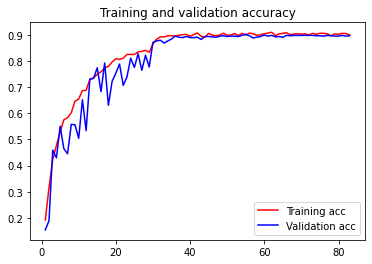

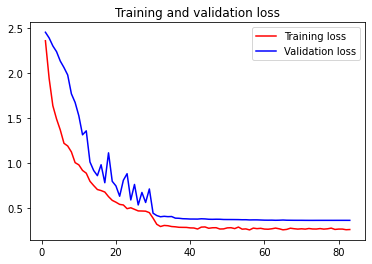

In [42]:
# Plot training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'red', label='Training acc')
plt.plot(epochs, val_acc, 'blue', label='Validation acc')
plt.legend()

plt.figure()
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'red', label='Training loss')
plt.plot(epochs, val_loss, 'blue', label='Validation loss')

plt.legend()

plt.show()

In [43]:
# Score trained model
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 10ms/step - loss: 0.4121 - accuracy: 0.8766
Test loss: 0.41208896040916443
Test accuracy: 0.8765778541564941


In [44]:
y_pred = model.predict(X_test)
y_pred

array([[1.8585669e-01, 2.2516035e-06, 4.1919957e-06, ..., 6.4197907e-06,
        9.3940418e-04, 1.2739225e-03],
       [1.6059267e-03, 8.9599118e-02, 3.3341553e-03, ..., 1.4212560e-02,
        1.8227634e-01, 2.7821071e-03],
       [1.5711309e-04, 2.1892656e-03, 1.1665814e-03, ..., 7.9646415e-01,
        4.5737284e-03, 8.7864036e-03],
       ...,
       [3.4745029e-01, 2.6895063e-06, 1.5469250e-05, ..., 2.2717679e-06,
        4.5506973e-04, 3.7701664e-04],
       [3.8673266e-04, 2.4517829e-02, 9.5388299e-01, ..., 9.7598488e-05,
        7.1884430e-04, 3.1425687e-04],
       [3.4119414e-06, 3.0651972e-05, 5.7199810e-07, ..., 9.6323080e-03,
        2.3085099e-02, 2.4264036e-05]], dtype=float32)

In [45]:
# Get the correposnding of one-hot-encoding from predicted values instead of props
y_hat=np.zeros(np.array(y_pred).shape)
for image in range(y_pred.shape[0]):
  y_hat[image][y_pred[image].tolist().index(max(y_pred[image]))]=1
y_hat = y_hat.astype(int)
y_hat

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
y_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test.argmax(axis=1), y_hat.argmax(axis=1))
print(cm)

=== Confusion Matrix ===
[[21  0  0  1  2  2 14  0  2  0  0  1]
 [ 0 56  0  0  0  1  0  0  1  0  1  0]
 [ 0  4 35  0  0  0  0  0  0  0  1  0]
 [ 0  0  0 86  0  0  0  1  1  3  1  0]
 [ 0  0  1  0 34  0  1  0  0  0  0  0]
 [ 0  2  2  1  1 55  0  0  0  0  1  0]
 [10  0  0  0  0  0 80  0  0  0  0  0]
 [ 0  1  0  0  2  0  1 32  0  0  1  1]
 [ 1  2  0  1  0  2  2  0 71  4  0  0]
 [ 0  0  0  0  0  0  0  0  4 17  3  0]
 [ 0  0  0  0  0  0  0  0  0  2 82  0]
 [ 0  0  0  1  0  3  0  0  1  1  0 56]]


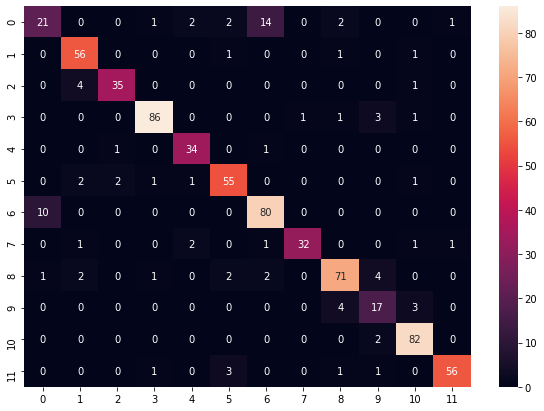

In [49]:
df_cm = pd.DataFrame(cm, index = [i for i in range(0, 12)],
                     columns = [i for i in range(0, 12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

In [50]:
print("=== Classification Report ===")
print(classification_report(y_test.argmax(axis=1), y_hat.argmax(axis=1)))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.66      0.49      0.56        43
           1       0.86      0.95      0.90        59
           2       0.92      0.88      0.90        40
           3       0.96      0.93      0.95        92
           4       0.87      0.94      0.91        36
           5       0.87      0.89      0.88        62
           6       0.82      0.89      0.85        90
           7       0.97      0.84      0.90        38
           8       0.89      0.86      0.87        83
           9       0.63      0.71      0.67        24
          10       0.91      0.98      0.94        84
          11       0.97      0.90      0.93        62

    accuracy                           0.88       713
   macro avg       0.86      0.85      0.85       713
weighted avg       0.88      0.88      0.87       713



6. Visualize predictions for *x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]*. (5 Marks)

In [51]:
# Get the test images without preprocessing
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(images, labels, train_size=0.7, random_state=0)
X_val_1, X_test_1, y_val_1, y_test_1 = train_test_split(X_test_1, y_test_1, train_size=0.5, random_state=0)

Test Image:  2


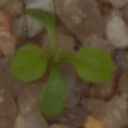

Predicted class is:  Maize
Actual class is:  Maize

Test Image:  3


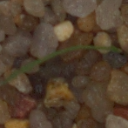

Predicted class is:  Cleavers
Actual class is:  Cleavers

Test Image:  33


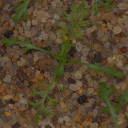

Predicted class is:  Sugar beet
Actual class is:  Sugar beet

Test Image:  36


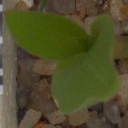

Predicted class is:  Fat Hen
Actual class is:  centless Mayweed

Test Image:  59


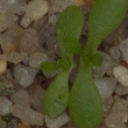

Predicted class is:  Fat Hen
Actual class is:  Sugar beet



In [52]:
# Visualize predictions
test_list = [2, 3, 33, 36, 59]

for i in test_list:
  print('Test Image: ', i)
  cv2_imshow(X_test_1[i])
  print('Predicted class is: ',\
        label_dict[model.predict(X_test)[i].tolist().index(max(model.predict(X_test)[i]))])
  print('Actual class is: ', label_dict[get_ndarray_index(y_test, i)])
  print()